# Tutorial- Deep Learning Using Keras, Python

# 1. 데이터 불러오기(MNIST)

In [ ]:
from keras.datasets import mnist #MNIST 

In [21]:
#train/test images/labels
(train_images, train_labels), (test_images, test_labels)= mnist.load_data()

In [22]:
train_images.shape

(60000, 28, 28)

In [23]:
len(train_labels)

60000

In [24]:
test_images.shape

(10000, 28, 28)

In [25]:
len(test_labels)

10000

In [26]:
digit=train_images[4] #MNIST Training set의 5번째 이미지- python은 0부터 셈 
digit # 픽셀값 확인

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

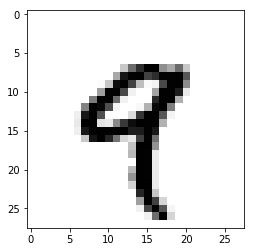

In [27]:
#위에서 저장한 5번째 이미지에 대해 시각화를 해봄- 9임을 알 수 있음
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

# 2. 모델링(학습과정, 3-layer network, softmax classifier : 분류문제)

In [8]:
# 입력층, 은닉층, 출력층, 총 3개 레이어 짜리 네트워크를 구성하기 위한 패키지 import
from keras import models
from keras import layers

In [9]:
#네트워크 정의, input_shape: 28*28(mnist), 출력층의 노드수: 10개(0부터 9까지를 분류하는 네트워크이므로)
network=models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

In [10]:
# loss function(학습에 이용할 손실함수 정의): categorical_crossentropy, optimizer(최적화 방식): rmsprop, 학습중 보여줄 지표: accuracy
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
train_images= train_images.reshape((60000,28*28)) #은닉층의 input_shape에 맞게 28*28로 reshape, 60,000은 Training 샘플 크기
train_images= train_images.astype('float32')/255 # 뉴럴 네트워크는 scale에 민감하기 때문에, scaling 필요함 

test_images= test_images.reshape((10000,28*28)) #은닉층의 input_shape에 맞게 28*28로 reshape, 10,000은 Training 샘플 크기
test_images= test_images.astype('float32') /255  # 뉴럴 네트워크는 scale에 민감하기 때문에, scaling 필요함 

In [12]:
#y 변수: label(0~9)에 대해, one-hot encoding을 해줘야함
from keras.utils import to_categorical
train_labels= to_categorical(train_labels)
test_labels= to_categorical(test_labels)

In [13]:
#fit은 학습을 진행하라는 의미, train_images: X 변수, train_labels: Y 변수, batch size: 60,000개 중 128개씩 나눠서 학습, epoch: 60,000개 전부 학습을 5번 반복
network.fit(train_images, train_labels, epochs=5, batch_size=128) #batch size =128 (미니배치방법), 배치방법:한꺼번에 모든 샘플 사용, sgd: 확률적으로 1개씩

Epoch 1/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.2546 - acc: 0.9266
Epoch 2/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.1032 - acc: 0.9693
Epoch 3/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.0689 - acc: 0.9793
Epoch 4/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.0496 - acc: 0.9851
Epoch 5/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.0372 - acc: 0.9887


# 3. 모델 검증(Using test set, by accuracy)

In [17]:
#위에서 학습시킨 'network'라는 모델을, 미리 정의해둔 test_images(new X), test_labels(new Y)로 모델 검증 
test_loss, test_acc= network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 25us/step


In [18]:
print('test_acc:', test_acc) #모델 검증 결과 : ACCURACY: XX

test_acc: 0.9807
